# Pre Loading Libraries

In [1]:
from keras.preprocessing.text import Tokenizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Data Loading & Exploration

In [2]:
#read data and figure out what it has.
df = pd.read_csv('train.csv')
display(df.head(100))
display(df.info())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

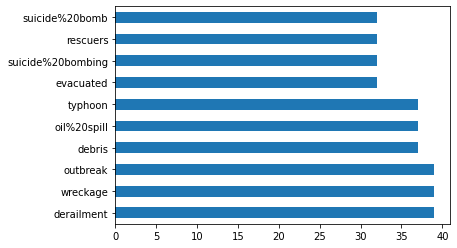

In [3]:
import seaborn as sns

df_dis = df[df['target']==1]
df_dis['keyword'].value_counts()[:10].plot(kind='barh')

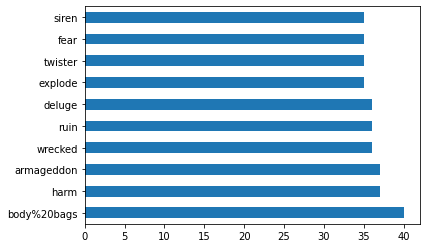

In [4]:
df_non_dis = df[df['target']==0]
df_non_dis['keyword'].value_counts()[:10].plot(kind='barh')

In [5]:
print(len(df_dis['keyword'].unique()))
print(len(df_non_dis['keyword'].unique()))

221
219


In [6]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

ret = intersection(df_dis['keyword'].unique(), df_non_dis['keyword'].unique())
print(len(ret))
print(ret)

217
['ablaze', 'accident', 'airplane%20accident', 'ambulance', 'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging', 'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse', 'buildings%20burning', 'buildings%20on%20fire', 'burned', 'burning', 'burning%20buildings', 'bush%20fires', 'casualties', 'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency', 'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided', 'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'deluge', 'deluged', 'demolish', 'demolished', 'demolition', 'derail', 'derailed', 'desolate', 'desolation', 'destroy', 'destroyed', 'destruction', 'detonate', 'detonation', 'devastated', 'devastation', '

In [7]:
setDisaster = set(df_dis['keyword'].unique())
setNonDisaster = set(df_non_dis['keyword'].unique())
print(len(setDisaster))
print(len(setNonDisaster))
print(setDisaster - setNonDisaster)
print(setNonDisaster-setDisaster)

221
219
{'debris', 'wreckage', 'derailment'}
{'aftershock'}


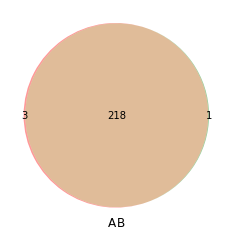

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles

venn2([set(df_dis['keyword']), set(df_non_dis['keyword'])])
plt.show()


Text(0.5, 1.0, "the number of unique words of 'keyword' feature")

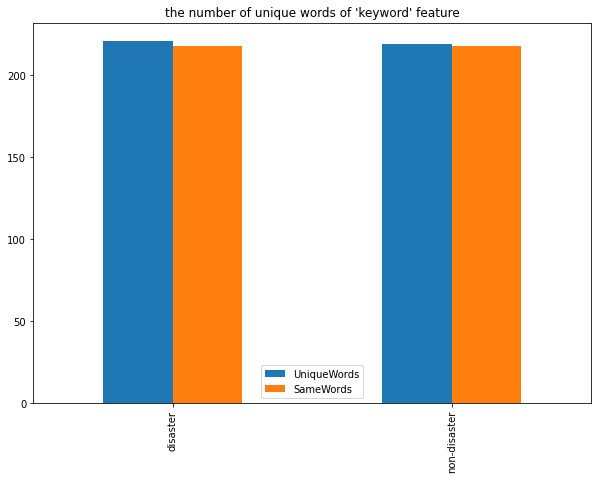

In [9]:
plotdata = pd.DataFrame({
    "UniqueWords":[221, 219],
    "SameWords":[218,218]},

    index=["disaster", "non-disaster"])

plotdata.plot(kind="bar",figsize=(10,7))
plt.title("the number of unique words of 'keyword' feature")

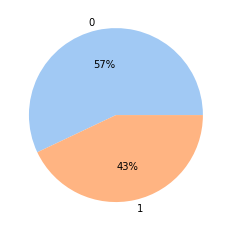

In [10]:
import seaborn as sns

#define data
data = [4342, 3271]
labels = ['0', '1']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


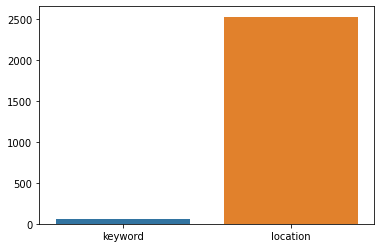

In [11]:
missing_cols = ['keyword', 'location']
sns.barplot(x=df[missing_cols].isnull().sum().index, y=df[missing_cols].isnull().sum().values)

In [12]:
display(df.head())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
df = df.drop(['id', 'keyword','location'], axis = 1)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


# Data Cleaning

**Make Characters to Lower Case**

In [15]:
df["CleanText"] = df["text"].apply(lambda x: x.lower())
df.head()

,text,target,CleanText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


**Remove unnecessary text: URL,HTML,Emojis, punctuation**

In [16]:
#remove URL
df["CleanText"] = df["CleanText"].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", "",x))

In [17]:
#remove numbers
#number affect accuracy, So I decided to keep numbers.
#df["CleanText"] = df["CleanText"].apply(lambda x: re.sub(r'[0-9]', "",x))

In [18]:
#remove html
def removeHTML(text):
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

df["CleanText"] = df["CleanText"].apply(lambda x: removeHTML(x))

In [19]:
#remove emojis
def removeEmojis(text):
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df["CleanText"] = df["CleanText"].apply(lambda x: removeEmojis(x))

In [20]:
#remove '.'
def RemovePunctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df["CleanText"] = df["CleanText"].apply(lambda x: RemovePunctuation(x))

In [21]:
#remove ascii code

def RemoveASCII(text):
  return re.sub(r'[^\x00-\x7f]', "", text)

df["CleanText"] = df["CleanText"].apply(lambda x: RemoveASCII(x))

In [22]:
df.head()

,text,target,CleanText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


#Data normalization ([NLTK](https://www.nltk.org/index.html)) 

**Tokenizer**

In [23]:
df['TokenizedText'] = df['CleanText'].apply(nltk.word_tokenize)

In [24]:
display(df.head())

,text,target,CleanText,TokenizedText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


**Remove Stopwords**

In [25]:
stop = set(stopwords.words('english'))
df['RemoveStopWords'] = df['TokenizedText'].apply(lambda x: [word for word in x if word not in stop])
df.head()


,text,target,CleanText,TokenizedText,RemoveStopWords
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


**PorterStemmer**

What is PorterStemmer in NLP?
Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

In [26]:
def doPorterStemmer(text):
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

df['PorterStemmer'] = df['RemoveStopWords'].apply(lambda x: doPorterStemmer(x))
df.head()

,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]"
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."


**WordNetLemmatizer**

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

In [27]:
def doLemmatizeWord(text):
    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word) for word in text]
    return lemma

df['LemmatizedText'] = df['RemoveStopWords'].apply(lambda x: doLemmatizeWord(x))
df.head()


,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer,LemmatizedText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [28]:
#decide to use WordNetLemmatizer cuz apparently, it is better than stemming.
df['FINAL']=df['LemmatizedText'].apply(lambda x: ''.join(i+' ' for i in x))
df.head()

,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer,LemmatizedText,FINAL
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of...",resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...


In [29]:
#Wanted to check examples for paper.
df.to_csv("normalized_dataset.csv")

# Visualization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


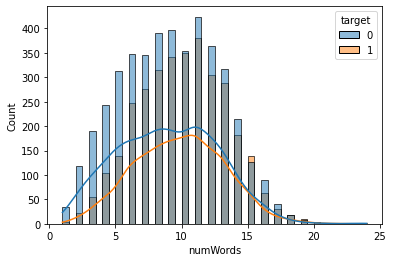

In [ ]:
df['LemmatizedText']

df['numWords']= 0

for ind in df.index:
     #print(len(df['LemmatizedText'][ind]))
     df['numWords'][ind] = len(df['LemmatizedText'][ind])

sns.histplot(data=df, x="numWords", hue='target', kde=True)

In [ ]:
!pip install git+https://git@github.com/kavgan/word_cloud.git

  Cloning https://****@github.com/kavgan/word_cloud.git to /tmp/pip-req-build-pzk6qhzr
  Running command git clone -q 'https://****@github.com/kavgan/word_cloud.git' /tmp/pip-req-build-pzk6qhzr
  Created wheel for word-cloud: filename=word_cloud-0.0.0-py3-none-any.whl size=5896 sha256=1bad28a4ba38c0cd191c46abc28c0eeeb10e373cd72d25c611a57baa181c9ec6
  Stored in directory: /tmp/pip-ephem-wheel-cache-ynpkqadt/wheels/31/4e/42/acc6e2273058cf74bac4046fcc43d99a1016e6967c001d1fcf
Successfully built word-cloud


In [ ]:
df_disaster = df[df['target']==1]
df_nodisater = df[df['target']==0]

In [ ]:
ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "said","you", "your", "yours", "yourself",
    "yourselves"])

In [ ]:
from word_cloud.word_cloud_generator import WordCloud
from IPython.core.display import HTML

texts= df_disaster['FINAL']
wc=WordCloud(use_tfidf=False,stopwords=ENGLISH_STOP_WORDS)

embed_code=wc.get_embed_code(text=texts,random_color=False,topn=50)
HTML(embed_code)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
texts= df_nodisater['FINAL']
wc=WordCloud(use_tfidf=False,stopwords=ENGLISH_STOP_WORDS)

embed_code=wc.get_embed_code(text=texts,random_color=False,topn=50)
HTML(embed_code)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Word Embedding to transform text to Numerical data


**We will make three different numerical datasets**

**Bag Of Words using CounterVector**

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
cv_df = vectorizer.fit_transform(df['FINAL'])

vectorizer.get_feature_names_out()
print(cv_df.shape)

(7613, 16270)


**Visualization**


In [31]:
#cv_arr = cv_df.toarray()
#cv_arr_df = pd.DataFrame(data=cv_arr,columns = vectorizer.get_feature_names())
#desc = cv_arr_df.describe()
 
#dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))
'''
dis_countvectorizer = CountVectorizer()
cv_disaster = dis_countvectorizer.fit_transform(df_disaster['FINAL'])

nodis_countvectorizer = CountVectorizer()
cv_nodisaster = nodis_countvectorizer.fit_transform(df_nodisater['FINAL'])

sorted_cv_dis = dict(sorted(dis_countvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))
sorted_cv_nodis = dict(sorted(nodis_countvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))
'''
#print(sorted_cv_dis)
#print(sorted_cv_nodis)

#print(dis_countvectorizer.vocabulary_.keys())

"\ndis_countvectorizer = CountVectorizer()\ncv_disaster = dis_countvectorizer.fit_transform(df_disaster['FINAL'])\n\nnodis_countvectorizer = CountVectorizer()\ncv_nodisaster = nodis_countvectorizer.fit_transform(df_nodisater['FINAL'])\n\nsorted_cv_dis = dict(sorted(dis_countvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))\nsorted_cv_nodis = dict(sorted(nodis_countvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))\n"

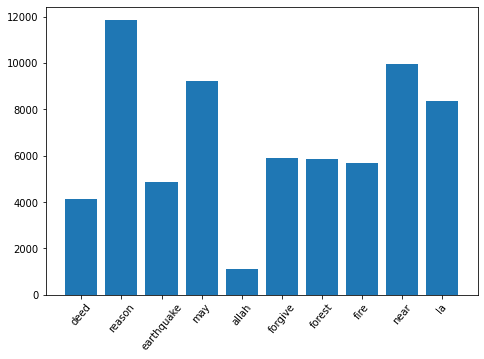

In [32]:
cv_key_list = list(vectorizer.vocabulary_.keys())
cv_values_list = list(vectorizer.vocabulary_.values())
#print(cv_key_list)
#print(cv_values_list)

import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(cv_key_list[:10], cv_values_list[:10])
plt.xticks(rotation=50)
plt.show()

**TF-IDF**


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvectorizer = TfidfVectorizer(ngram_range = (1,2))
tfidf_df = tfvectorizer.fit_transform(df['FINAL'])
print(tfidf_df.shape)

(7613, 63245)


 **visualization**

In [34]:
'''dis_tdidfvectorizer = CountVectorizer()
tdidf_disaster = dis_tdidfvectorizer.fit_transform(df_disaster['FINAL'])

nodis_tdidfvectorizer = CountVectorizer()
tdidf_nodisaster = nodis_tdidfvectorizer.fit_transform(df_nodisater['FINAL'])

#print(dis_tdidfvectorizer.vocabulary_)
#print(nodis_tdidfvectorizer.vocabulary_)

sorted_tdidf_dis = dict(sorted(dis_tdidfvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))
sorted_tdidf_nodis = dict(sorted(nodis_tdidfvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))

#print(sorted_tdidf_dis)
#print(sorted_tdidf_nodis)'''

"dis_tdidfvectorizer = CountVectorizer()\ntdidf_disaster = dis_tdidfvectorizer.fit_transform(df_disaster['FINAL'])\n\nnodis_tdidfvectorizer = CountVectorizer()\ntdidf_nodisaster = nodis_tdidfvectorizer.fit_transform(df_nodisater['FINAL'])\n\n#print(dis_tdidfvectorizer.vocabulary_)\n#print(nodis_tdidfvectorizer.vocabulary_)\n\nsorted_tdidf_dis = dict(sorted(dis_tdidfvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))\nsorted_tdidf_nodis = dict(sorted(nodis_tdidfvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))\n\n#print(sorted_tdidf_dis)\n#print(sorted_tdidf_nodis)"

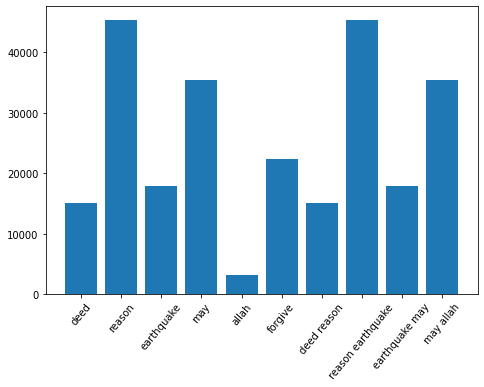

In [35]:
tfidf_key_list = list(tfvectorizer.vocabulary_.keys())
tfidf_values_list = list(tfvectorizer.vocabulary_.values())
#print(tfidf_key_list)
#print(tfidf_values_list)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tfidf_key_list[:10], tfidf_values_list[:10])
plt.xticks(rotation=50)
plt.show()

**Word2Vec**

In [36]:
from gensim.models import Word2Vec, KeyedVectors
import nltk
import multiprocessing

In [37]:
sentences = df['FINAL'].values
sentences = [nltk.word_tokenize(sent) for sent in sentences]


In [38]:
#print(sentences)

In [39]:
#print(list(df['LemmatizedText']))

In [40]:
w2v_size = 300

In [41]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer


w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=w2v_size,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)


In [42]:
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(1441465, 2133030)

In [43]:
w2v_model.wv.similarity("fire", 'wildfire')

0.97847843

In [44]:
w2v_model.wv.most_similar(positive=["disaster"])


[('declares', 0.9979259967803955),
 ('sign', 0.9974835515022278),
 ('marians', 0.994666337966919),
 ('obama', 0.9942421913146973),
 ('declaration', 0.9940277338027954),
 ('saipan', 0.9927036166191101),
 ('typhoondevastated', 0.9881811141967773),
 ('northern', 0.986901044845581),
 ('abcnews', 0.8936506509780884),
 ('losdelsonido', 0.8934838175773621)]

In [45]:
w2v_model.wv.most_similar(positive=["evacuation"])


[('faan', 0.9996529817581177),
 ('order', 0.9995575547218323),
 ('town', 0.9992793798446655),
 ('noted', 0.999264657497406),
 ('ultimatum', 0.9992635250091553),
 ('cabin', 0.9992395639419556),
 ('ibrahimmisau', 0.9992105960845947),
 ('lifted', 0.9992098212242126),
 ('cocker', 0.9991681575775146),
 ('interesting', 0.9991668462753296)]

In [46]:
w2v_model.wv.most_similar(positive=["injury"])


[('w', 0.9998201727867126),
 ('thought', 0.9998195767402649),
 ('kid', 0.9998177886009216),
 ('care', 0.9998156428337097),
 ('thanks', 0.9998153448104858),
 ('join', 0.9998111128807068),
 ('brain', 0.9998105764389038),
 ('mean', 0.9998102784156799),
 ('weird', 0.9998101592063904),
 ('friend', 0.9998093247413635)]

In [47]:
words = list(w2v_model.wv.vocab)
#words

In [48]:
w2v_df = []
for sent in sentences:
    vw = np.zeros(w2v_size) 
    #one sentence has many words
    for word in sent:
        vw += w2v_model[word]
    #average
    vw = vw/len(sent)
    w2v_df.append(np.array(vw))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [49]:
print(len(w2v_df))
print(len(w2v_df[0]))

#print(w2v_model['earthquake'])

7613
300


## Word2Vec with Visualization (reference - 

In [50]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def word2vec_scatterplot(model, word, list_names):

    arrays = np.empty((0, w2v_size), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality with PCA
    reduc = PCA(n_components=21).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


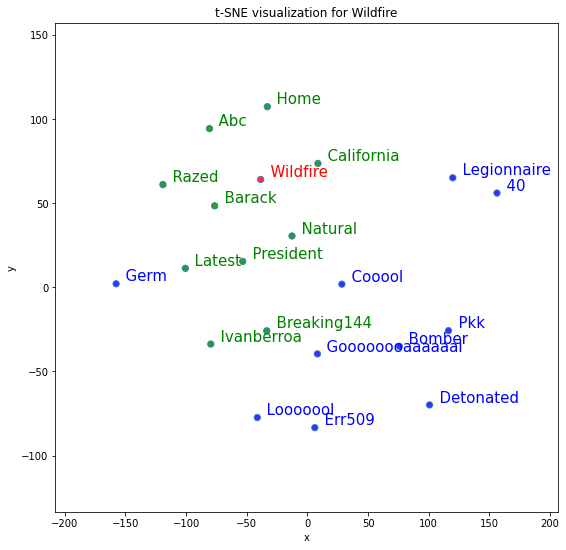

In [51]:
word2vec_scatterplot(w2v_model, 'wildfire', [i[0] for i in w2v_model.wv.most_similar(negative=["wildfire"])])

# Reduce Dimension PCA 

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

trans_w2v_df = StandardScaler().fit_transform(w2v_df)

#reduce dimention half
pca = PCA(n_components=100)
pca_trans_w2v_df = pca.fit_transform(trans_w2v_df)

print(pca_trans_w2v_df.shape) 

df_pca_visual = pd.DataFrame({'com1': pca_trans_w2v_df[:,1], 'com2': pca_trans_w2v_df[:,2]})
display(df_pca_visual.head())

df_pca_visual['target'] = df['target']
display(df_pca_visual.head())

#sns.scatterplot(data=df_pca_visual, x="com1", y="com2", hue="target")

(7613, 100)


,com1,com2
0,-1.508780,-1.069703
1,-1.094479,-0.760882
2,-0.669007,-0.170004
3,-0.706915,4.388533
4,-1.388835,1.658736


,com1,com2,target
0,-1.508780,-1.069703,1
1,-1.094479,-0.760882,1
2,-0.669007,-0.170004,1
3,-0.706915,4.388533,1
4,-1.388835,1.658736,1


In [53]:
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

trans_w2v_df = StandardScaler().fit_transform(w2v_df)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda_w2v_df = lda.fit_transform(trans_w2v_df, df['target'])
print(lda_w2v_df.shape) 


lda_w2v_df_visual = pd.DataFrame({'lda_com': lda_w2v_df[:,0]})
display(lda_w2v_df_visual.head())

lda_w2v_df_visual['target'] = df['target']
display(lda_w2v_df_visual.head())


import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="lda_com" ,y="target" , data=lda_w2v_df_visual)'''
  

'\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis\n\ntrans_w2v_df = StandardScaler().fit_transform(w2v_df)\n\n# apply Linear Discriminant Analysis\nlda = LinearDiscriminantAnalysis(n_components=1)\nlda_w2v_df = lda.fit_transform(trans_w2v_df, df[\'target\'])\nprint(lda_w2v_df.shape) \n\n\nlda_w2v_df_visual = pd.DataFrame({\'lda_com\': lda_w2v_df[:,0]})\ndisplay(lda_w2v_df_visual.head())\n\nlda_w2v_df_visual[\'target\'] = df[\'target\']\ndisplay(lda_w2v_df_visual.head())\n\n\nimport seaborn as sns\nsns.set_theme(style="whitegrid")\nax = sns.stripplot(x="lda_com" ,y="target" , data=lda_w2v_df_visual)'

(7613, 2)


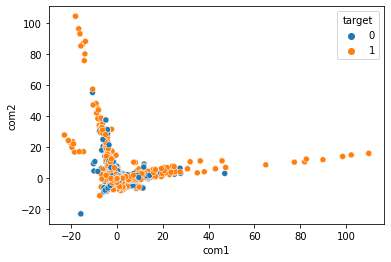

In [54]:
# This is for visualization code
from sklearn.decomposition import PCA

pca_visual = PCA(n_components=2)
df_visual = pca_visual.fit_transform(trans_w2v_df)
print(df_visual.shape) 

df_pca_visual = pd.DataFrame(df_visual, columns=['com1', 'com2'])
#display(df_pca_visual.head())

df_pca_visual['target'] = df['target']
#display(df_pca_visual.head())
sns.scatterplot(data=df_pca_visual, x="com1", y="com2", hue="target")


# Data Split

In [55]:
cv_df.shape

(7613, 16270)

In [56]:
tfidf_df.shape

(7613, 63245)

In [57]:
print(len(w2v_df))
print(len(w2v_df[0]))

7613
300


In [58]:
pca_trans_w2v_df.shape

(7613, 100)

In [59]:
from sklearn.model_selection import train_test_split

cv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)
tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)
w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)
pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y = train_test_split(pca_trans_w2v_df, df['target'], test_size=0.30, random_state=17)

In [60]:
cv_train_X.shape

(5329, 16270)

In [61]:
cv_test_y.shape

(2284,)

In [62]:
tfidf_train_X.shape

(5329, 63245)

In [63]:
pca_w2v_train_X.shape

(5329, 100)

# *LogisticRegression* best CV 0.801




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def model_Logistic(train_X, test_X, train_y, test_y) :
  logisticRegr = LogisticRegression()
  logisticRegr.fit(train_X, train_y)
  pred_y = logisticRegr.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))


In [ ]:
#model_Logistic(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
#model_Logistic(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
#model_Logistic(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
#model_Logistic(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)

accuracy_score: 0.797
Recall: 0.693
Precision: 0.813
F1 Score: 0.749
accuracy_score: 0.776
Recall: 0.539
Precision: 0.908
F1 Score: 0.677
accuracy_score: 0.670
Recall: 0.316
Precision: 0.809
F1 Score: 0.454
accuracy_score: 0.758
Recall: 0.609
Precision: 0.787
F1 Score: 0.686


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**LogitricRegression with CountVector has better accuracy**


In [ ]:
#cv_train_X, cv_test_X, cv_train_Y, cv_test_y

'''
#To find best tuning option


group_c = [10, 5, 1, 0.1, 0.001]

for c in group_c:
    logistic_lasso = LogisticRegression(C=c, penalty='l1', tol=0.001, solver='liblinear', random_state=42,  max_iter=10000) #lasso
    logistic_ridge = LogisticRegression(C=c, penalty='l2', tol=0.001, solver='liblinear', random_state=42, max_iter=10000)  #Ridge 
    l_ela = LogisticRegression(C=c, penalty='elasticnet', solver='saga', l1_ratio=0.5, tol=0.001, max_iter=10000)
    
    logistic_lasso.fit(cv_train_X, cv_train_Y.values.ravel())
    logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())
    l_ela.fit(cv_train_X, cv_train_Y.values.ravel())
    
    coef_l1_LR = logistic_lasso.coef_.ravel()
    coef_l2_LR = logistic_ridge.coef_.ravel()
    coef_ela_LR = l_ela.coef_.ravel()
    
    # coef_l1_LR contains zeros due to the L1 sparsity inducing norm
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100 
    sparsity_l_ela = np.mean(coef_ela_LR == 0) * 100 

    print("\n C=%.5f" % c)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Ela penalty:", sparsity_l_ela))
    print("{:<40} {:.3f}".format("Score with L1 penalty:", logistic_lasso.score(cv_test_X, cv_test_y.values.ravel())))  #lasso score
    print("{:<40} {:.3f}".format("Score with L2 penalty:",logistic_ridge.score(cv_test_X, cv_test_y.values.ravel())))   #ridge score
    print("{:<40} {:.3f}".format("Score with Ela penalty:",l_ela.score(cv_test_X, cv_test_y.values.ravel())))   #elastic score

'''


 C=10.00000
Sparsity with L1 penalty:                84.36%
Sparsity with L2 penalty:                20.19%
Sparsity with Ela penalty:               38.11%
Score with L1 penalty:                   0.768
Score with L2 penalty:                   0.783
Score with Ela penalty:                  0.783

 C=5.00000
Sparsity with L1 penalty:                85.74%
Sparsity with L2 penalty:                20.19%
Sparsity with Ela penalty:               49.55%
Score with L1 penalty:                   0.771
Score with L2 penalty:                   0.784
Score with Ela penalty:                  0.788

 C=1.00000
Sparsity with L1 penalty:                94.12%
Sparsity with L2 penalty:                20.19%
Sparsity with Ela penalty:               81.03%
Score with L1 penalty:                   0.782
Score with L2 penalty:                   0.797
Score with Ela penalty:                  0.789

 C=0.10000
Sparsity with L1 penalty:                99.53%
Sparsity with L2 penalty:                20.19%


**Best parameters**

accuracy_score: 0.801
Recall: 0.687
Precision: 0.826
F1 Score: 0.750


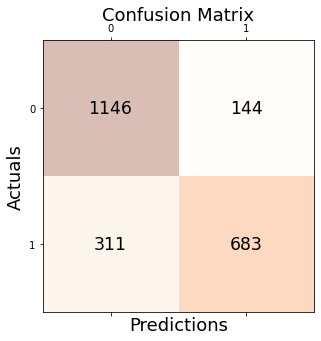

In [ ]:
''' BEST OPTION'''
#cv_train_X, cv_test_X, cv_train_Y, cv_test_y

logisticRegr = LogisticRegression(C=0.45, penalty='l2', tol=0.01, solver='liblinear', random_state=42, max_iter=100)
logisticRegr.fit(cv_train_X, cv_train_Y)
pred_y = logisticRegr.predict(cv_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, pred_y))
print('Recall: %.3f' % recall_score(cv_test_y, pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, pred_y))


conf_matrix = confusion_matrix(y_true=cv_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# Model - SVM Best cv 0.800

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


 
def model_SVM(train_X, test_X, train_y, test_y) :
  svm_clf = svm.SVC()
  svm_clf= svm_clf.fit(train_X, train_y)
  pred_y = svm_clf.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))

**Training three datasets on Basic SVM and Prediction/Accuracy**

In [ ]:
'''
model_SVM(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_SVM(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_SVM(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_SVM(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)
'''

accuracy_score: 0.799
Recall: 0.639
Precision: 0.864
F1 Score: 0.735
accuracy_score: 0.761
Recall: 0.493
Precision: 0.923
F1 Score: 0.643
accuracy_score: 0.627
Recall: 0.171
Precision: 0.859
F1 Score: 0.285
accuracy_score: 0.710
Recall: 0.438
Precision: 0.809
F1 Score: 0.568


**SVM with CounterVector has higher accuracy**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def testModel(train_x, test_x, train_y, test_y, _c, _gam, _kn):
  SVM = svm.SVC(kernel=_kn, C=_c)
  SVM.fit(train_x, train_y)
  pred_y = SVM.predict(test_x)
  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  #print('Recall: %.3f' % recall_score(test_y, pred_y))
  #print('Precision: %.3f' % precision_score(test_y, pred_y))
  #print('F1 Score: %.3f' % f1_score(test_y, pred_y))

  '''
  conf_matrix = confusion_matrix(y_true=test_y, y_pred=pred_y)
  #
  # Print the confusion matrix using Matplotlib
  #
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  '''

'''
group_c = [5, 1, 0.1, 0.05, 0.01, 0.001]
group_gam = [5, 1, 0.1, 0.05, 0.01, 0.001]

for c in group_c:
  print("C value:", c)
  for gam in group_gam:
    print("gam value:", gam)
    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'linear')


for c in group_c:
  print("C value:", c)
  for gam in group_gam:
    print("gam value:", gam)
    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'rbf')


for c in group_c:
  print("C value:", c)
  for gam in group_gam:
    print("gam value:", gam)
    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'poly')


for c in group_c:
  print("C value:", c)
  for gam in group_gam:
    print("gam value:", gam)
    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'sigmoid')

#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'linear')
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'rbf')
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, 1, 'auto', 'poly')

#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, 1, 'auto', 'sigmoid')

'''

C value: 5
gam value: 5
accuracy_score: 0.762
gam value: 1
accuracy_score: 0.762
gam value: 0.1
accuracy_score: 0.762
gam value: 0.05
accuracy_score: 0.762
gam value: 0.01
accuracy_score: 0.762
gam value: 0.001
accuracy_score: 0.762
C value: 1
gam value: 5
accuracy_score: 0.779
gam value: 1
accuracy_score: 0.779
gam value: 0.1
accuracy_score: 0.779
gam value: 0.05
accuracy_score: 0.779
gam value: 0.01
accuracy_score: 0.779
gam value: 0.001
accuracy_score: 0.779
C value: 0.1
gam value: 5
accuracy_score: 0.796
gam value: 1
accuracy_score: 0.796
gam value: 0.1
accuracy_score: 0.796
gam value: 0.05
accuracy_score: 0.796
gam value: 0.01
accuracy_score: 0.796
gam value: 0.001
accuracy_score: 0.796
C value: 0.05
gam value: 5
accuracy_score: 0.794
gam value: 1
accuracy_score: 0.794
gam value: 0.1
accuracy_score: 0.794
gam value: 0.05
accuracy_score: 0.794
gam value: 0.01
accuracy_score: 0.794
gam value: 0.001
accuracy_score: 0.794
C value: 0.01
gam value: 5
accuracy_score: 0.696
gam value: 1
a

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

'''Best option'''

def svm_model(train_x, test_x, train_y, test_y, _c, _gam, _kn):
  SVM = svm.SVC(kernel=_kn, C=_c)
  SVM.fit(train_x, train_y)
  pred_y = SVM.predict(test_x)
  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))

  conf_matrix = confusion_matrix(y_true=test_y, y_pred=pred_y)
  #
  # Print the confusion matrix using Matplotlib
  #
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  
svm_model(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, 1, 'auto', 'sigmoid')

# DecisionTree best Tf-Idf 0.756

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_DT (train_X, test_X, train_y, test_y) :
  clf = DecisionTreeClassifier()
  clf.fit(train_X, train_y)
  pred_y = clf.predict(test_X)
  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))


In [ ]:
'''
model_DT(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_DT(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_DT(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_DT(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)
'''

accuracy_score: 0.748
Recall: 0.662
Precision: 0.733
F1 Score: 0.696
accuracy_score: 0.750
Recall: 0.673
Precision: 0.731
F1 Score: 0.701
accuracy_score: 0.652
Recall: 0.606
Precision: 0.600
F1 Score: 0.603
accuracy_score: 0.679
Recall: 0.629
Precision: 0.632
F1 Score: 0.630


**Decision Tree with Td-Idf is higher accuracy.**

In [ ]:
def test_dt(x_train, x_test, y_train, y_test) :
    print()
    for c_depth in [2, 4, 6, 8, 10, 12, 20, 30, None] : 
        print("model selection depth = {0}".format(c_depth))
        clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=c_depth,  random_state=27)
        clf_gini.fit(x_train, y_train)
        y_pred = clf_gini.predict(x_test)
        print('gini accuracy_score: %.3f' % accuracy_score(y_test, y_pred))

        clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=c_depth,  random_state=27)
        clf_entropy.fit(x_train, y_train)
        y_pred = clf_entropy.predict(x_test)
        print('entropy accuracy_score: %.3f' % accuracy_score(y_test, y_pred))

#test_dt(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)

In [ ]:
def test_dt(x_train, x_test, y_train, y_test) :
    print()
    for min_sp in [2, 4, 6, 8, 10, 12, 20] : 
      clf_gini = DecisionTreeClassifier(min_samples_split=min_sp,  random_state=27)
      clf_gini.fit(x_train, y_train)
      y_pred = clf_gini.predict(x_test)
      print('gini accuracy_score: %.3f' % accuracy_score(y_test, y_pred))

#test_dt(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)

accuracy_score: 0.756
Recall: 0.681
Precision: 0.737
F1 Score: 0.708


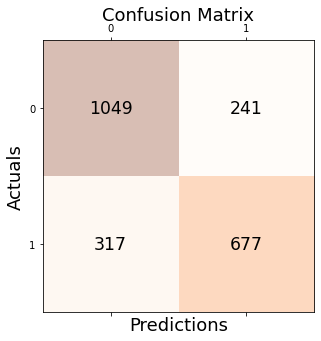

In [ ]:
#test_dt(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)

'''
  find best option

def __init__(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
'''

clf = DecisionTreeClassifier(min_samples_split=10, random_state=27)
clf.fit(tfidf_train_X, tfidf_train_Y)
pred_y = clf.predict(tfidf_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(tfidf_test_y, pred_y))
print('Recall: %.3f' % recall_score(tfidf_test_y, pred_y))
print('Precision: %.3f' % precision_score(tfidf_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(tfidf_test_y, pred_y))


conf_matrix = confusion_matrix(y_true=tfidf_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# RandomForestClassifier CV 0.799

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
 
def model_randomForestClf(train_X, test_X, train_y, test_y) :
  rf_clf = RandomForestClassifier(random_state=42)
  rf_clf = rf_clf.fit(train_X, train_y)
  pred_y = rf_clf.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))
'''
cv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)
tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)
w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)
pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y = train_test_split(pca_trans_w2v_df, df['target'], test_size=0.30, random_state=17)
'''

#model_randomForestClf(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
#model_randomForestClf(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
#model_randomForestClf(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
#model_randomForestClf(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)


accuracy_score: 0.785
Recall: 0.643
Precision: 0.826
F1 Score: 0.723
accuracy_score: 0.768
Recall: 0.549
Precision: 0.869
F1 Score: 0.673
accuracy_score: 0.727
Recall: 0.567
Precision: 0.744
F1 Score: 0.644
accuracy_score: 0.755
Recall: 0.616
Precision: 0.775
F1 Score: 0.686


In [ ]:
'''
cv_train_X, cv_test_X, cv_train_Y, cv_test_y
'''
rf_clf = RandomForestClassifier(n_estimators=250, random_state=42,
                                class_weight="balanced", min_samples_split=12)
rf_clf = rf_clf.fit(cv_train_X, cv_train_Y)
pred_y = rf_clf.predict(cv_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, pred_y))
print('Recall: %.3f' % recall_score(cv_test_y, pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, pred_y))

accuracy_score: 0.799
Recall: 0.704
Precision: 0.809
F1 Score: 0.753


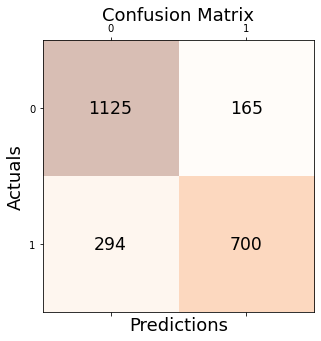

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=cv_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Xgboost best with pca_w2v - 0.778

---



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
 

def model_Xgboost(train_X, test_X, train_y, test_y) :
  xgb_clf = XGBClassifier(seed=27)
  xgb_clf.fit(train_X, train_y)
  pred_y = xgb_clf.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))
  print(xgb_clf)


model_Xgboost(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_Xgboost(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_Xgboost(np.array(w2v_train_X), w2v_test_X, w2v_train_Y, w2v_test_y)
model_Xgboost(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)


accuracy_score: 0.713
Recall: 0.402
Precision: 0.868
F1 Score: 0.550
XGBClassifier(seed=27)
accuracy_score: 0.729
Recall: 0.446
Precision: 0.865
F1 Score: 0.588
XGBClassifier(seed=27)
accuracy_score: 0.739
Recall: 0.566
Precision: 0.773
F1 Score: 0.654
XGBClassifier(seed=27)
accuracy_score: 0.757
Recall: 0.614
Precision: 0.780
F1 Score: 0.687
XGBClassifier(seed=27)


In [ ]:
xgb_clf = XGBClassifier(learning_rate =0.1,
     n_estimators=135,
     max_depth=10,
     min_child_weight=1,
     gamma=0.05,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=27)
print(xgb_clf)

xgb_clf = xgb_clf.fit(pca_w2v_train_X, pca_w2v_train_Y)
pred_y = xgb_clf.predict(pca_w2v_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(pca_w2v_test_y, pred_y))
print('Recall: %.3f' % recall_score(pca_w2v_test_y, pred_y))
print('Precision: %.3f' % precision_score(pca_w2v_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(pca_w2v_test_y, pred_y))
print()

XGBClassifier(colsample_bytree=0.8, gamma=0.05, max_depth=10, n_estimators=135,
              nthread=4, seed=27, subsample=0.8)
accuracy_score: 0.778
Recall: 0.651
Precision: 0.802
F1 Score: 0.718



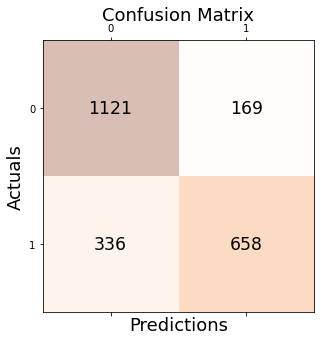

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=pca_w2v_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# LSTM [GLOVE](https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt) -0.803 ~ 0.813 

In [93]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Dropout,LSTM,SimpleRNN,Embedding,Bidirectional,LSTM,GlobalMaxPool1D
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)

'''
from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(1)
'''

'\nfrom numpy.random import seed\nseed(1)\n\nimport tensorflow as tf\ntf.random.set_seed(1)\n'

In [94]:
tweets = df['FINAL'].values

In [95]:
#This Tokenizer is by Keras
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(tweets)
vocab_length = len(word_tokenizer.word_index) + 1

#None values is embedding by 0
def embedding_by_using_keras(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

In [96]:
longest_tweet = max(tweets, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_tweet))

#create values to make it the same input size.
padded_sentences = pad_sequences(embedding_by_using_keras(tweets), length_long_sentence, padding='post')

In [97]:

pad_X_train, pad_X_test, pad_y_train, pad_y_test = train_test_split(padded_sentences, df['target'], test_size=0.30, random_state=17)

## GLOVE

In [98]:
#create embedding dictionary from glove txt file of Stanford.
embeddings_dictionary = dict()
embedding_dim = 100

glove_file = open('glove.6B.100d.txt',encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [99]:
embeddings_dictionary['disaster'].shape

(100,)

In [100]:
#Create embedding vector matrix with vocaburay made by this tweets data set
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [101]:
print(embedding_matrix.shape)

(16303, 100)


In [102]:
def BLSTM():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights = [embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [103]:
model_LSTM = BLSTM()
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model_LSTM.fit(
    pad_X_train, 
    pad_y_train, 
    epochs = 7,
    batch_size = 32,
    #validation_data = [pad_X_test, pad_y_test],
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
167/167 [==============================] - 13s 44ms/step - loss: 0.8175 - accuracy: 0.5714 - lr: 0.0010
Epoch 2/7
167/167 [==============================] - 7s 45ms/step - loss: 0.6080 - accuracy: 0.6864 - lr: 0.0010
Epoch 3/7
167/167 [==============================] - 7s 44ms/step - loss: 0.5460 - accuracy: 0.7427 - lr: 0.0010
Epoch 4/7
167/167 [==============================] - 8s 45ms/step - loss: 0.5087 - accuracy: 0.7728 - lr: 0.0010
Epoch 5/7
167/167 [==============================] - 7s 44ms/step - loss: 0.4733 - accuracy: 0.8020 - lr: 0.0010
Epoch 6/7
167/167 [==============================] - 7s 44ms/step - loss: 0.4453 - accuracy: 0.8144 - lr: 0.0010
Epoch 7/7
167/167 [==============================] - 7s 44ms/step - loss: 0.4218 - accuracy: 0.8334 - lr: 0.0010


In [104]:
loss, accuracy = model_LSTM.evaluate(pad_X_test, pad_y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

72/72 [==============================] - 1s 8ms/step - loss: 0.4352 - accuracy: 0.8065
Loss: 0.43520841002464294
Accuracy: 0.8064798712730408


In [105]:
lstm_glv_pred_y = (model_LSTM.predict(pad_X_test) > 0.5).astype("int32")
lstm_glv_pred_y_prob = model_LSTM.predict(pad_X_test)

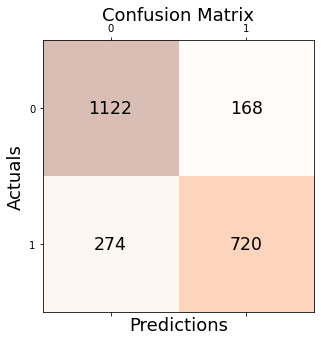

In [106]:

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=pad_y_test, y_pred=lstm_glv_pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# LSTM with Word2Vec - 0.781

In [ ]:
w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(1441465, 2133030)

In [ ]:
# total numberof extracted words.
w2v_vocab=w2v_model.wv.vocab
print("The total number of words are : ",len(w2v_vocab))

w2v_vocab=list(w2v_vocab.keys())

w2v_dictionary={}
for word in w2v_vocab:
  w2v_dictionary[word]=w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ",len(w2v_dictionary)) # should come equal to vocab size


The total number of words are :  16302
The no of key-value pairs :  16302


In [ ]:
# now creating the embedding matrix
embedding_matrix_by_word2vec =np.zeros(shape=(vocab_length, 100))

for word, index in word_tokenizer.word_index.items():
  embedding_vector = w2v_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix_by_word2vec[index]=embedding_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [ ]:
def BLSTM_W2V():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix_by_word2vec.shape[0], 
                        output_dim=embedding_matrix_by_word2vec.shape[1], 
                        weights = [embedding_matrix_by_word2vec], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_LSTM_W2V = BLSTM_W2V()
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model_LSTM_W2V.fit(
    pad_X_train, 
    pad_y_train, 
    epochs = 7,
    batch_size = 32,
    #validation_data = [pad_X_test, pad_y_test],
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
167/167 [==============================] - 14s 51ms/step - loss: 0.7171 - accuracy: 0.5613 - lr: 0.0010
Epoch 2/7
167/167 [==============================] - 8s 50ms/step - loss: 0.6268 - accuracy: 0.6594 - lr: 0.0010
Epoch 3/7
167/167 [==============================] - 9s 51ms/step - loss: 0.5089 - accuracy: 0.7701 - lr: 0.0010
Epoch 4/7
167/167 [==============================] - 9s 52ms/step - loss: 0.4369 - accuracy: 0.8197 - lr: 0.0010
Epoch 5/7
167/167 [==============================] - 9s 52ms/step - loss: 0.3850 - accuracy: 0.8514 - lr: 0.0010
Epoch 6/7
167/167 [==============================] - 9s 51ms/step - loss: 0.3288 - accuracy: 0.8833 - lr: 0.0010
Epoch 7/7
167/167 [==============================] - 8s 51ms/step - loss: 0.2995 - accuracy: 0.8966 - lr: 0.0010


In [ ]:
loss, accuracy = model_LSTM_W2V.evaluate(pad_X_test, pad_y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

72/72 [==============================] - 1s 9ms/step - loss: 0.6283 - accuracy: 0.7596
Loss: 0.628253698348999
Accuracy: 0.7596322298049927


In [ ]:
lstm_w2v_pred_y = (model_LSTM_W2V.predict(pad_X_test) > 0.5).astype("int32")
lstm_w2v_pred_y_prob = model_LSTM_W2V.predict(pad_X_test)

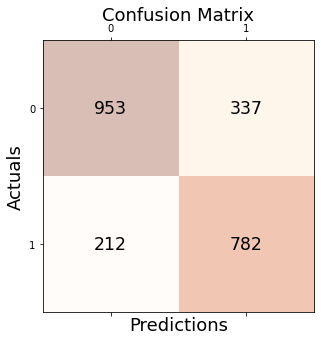

In [ ]:

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=pad_y_test, y_pred=lstm_w2v_pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Custom Ensemble
# (SVM+CV, LogisticR+CV, DT+tfidf, RandomF+cv, Xgboost+pca_word2vec) 
# (SVM+CV, LogisticR+CV, DT+tfidf, RandomF+cv, Xgboost+pca_word2vec + LSTM+glove) 

In [107]:
'''
cv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)
tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)
w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)
pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y = train_test_split(pca_trans_w2v_df, df['target'], test_size=0.30, random_state=17)
'''
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

cus_en_lr = LogisticRegression(C=0.45, penalty='l2', tol=0.01, solver='liblinear', random_state=42, max_iter=100)
cus_en_svm = svm.SVC(kernel='sigmoid', probability=True)
cus_en_dt = DecisionTreeClassifier(min_samples_split=10, random_state=27)
cus_en_rd = RandomForestClassifier(n_estimators=250, random_state=42,
                                class_weight="balanced", min_samples_split=12)
cus_xgb_clf = XGBClassifier(learning_rate =0.1,
     n_estimators=135,
     max_depth=10,
     min_child_weight=1,
     gamma=0.05,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=27)

cus_en_lr.fit(cv_train_X, cv_train_Y)
cus_en_svm.fit(cv_train_X, cv_train_Y)
cus_en_dt.fit(tfidf_train_X, tfidf_train_Y)
cus_en_rd.fit(cv_train_X, cv_train_Y)
cus_xgb_clf.fit(pca_w2v_train_X, pca_w2v_train_Y)

lr_pred_y = cus_en_lr.predict(cv_test_X)
svm_pred_y = cus_en_svm.predict(cv_test_X)
dt_pred_y = cus_en_dt.predict(tfidf_test_X)
rd_pred_y = cus_en_rd.predict(cv_test_X)
xgb_pred_y = cus_xgb_clf.predict(pca_w2v_test_X)


lr_pred_y_prob = cus_en_lr.predict_proba(cv_test_X)
svm_pred_y_prob = cus_en_svm.predict_proba(cv_test_X)
dt_pred_y_prob = cus_en_dt.predict_proba(tfidf_test_X)
rd_pred_y_prob = cus_en_rd.predict_proba(cv_test_X)
xgb_pred_y_prob = cus_xgb_clf.predict_proba(pca_w2v_test_X)


In [108]:
combined_pred_y = []

for idx in range(cv_test_y.shape[0]):
  if (lr_pred_y[idx]+svm_pred_y[idx]+rd_pred_y[idx]+dt_pred_y[idx]+xgb_pred_y[idx]>=3):
    combined_pred_y.append(1);
  else :
    combined_pred_y.append(0);

In [109]:
lr_pred_y.shape
combined_pred_y = np.asarray(combined_pred_y)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, combined_pred_y))
print('Recall: %.3f' % recall_score(cv_test_y, combined_pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, combined_pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, combined_pred_y))


accuracy_score: 0.812
Recall: 0.699
Precision: 0.841
F1 Score: 0.764


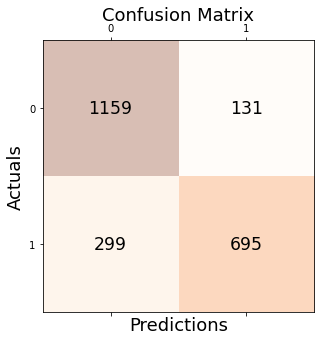

In [110]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=cv_test_y, y_pred=combined_pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [111]:
'''
combined_pred_y_prob = []
for idx in range(cv_test_y.shape[0]):
  max_neg = max([lr_pred_y_prob[idx][0],svm_pred_y_prob[idx][0],
                 rd_pred_y_prob[idx][0],xgb_pred_y_prob[idx][0], dt_pred_y_prob[idx][0]])
  max_pos = max([lr_pred_y_prob[idx][1],svm_pred_y_prob[idx][1],
                 rd_pred_y_prob[idx][1],xgb_pred_y_prob[idx][1], dt_pred_y_prob[idx][1]])
  
  if (max_neg<max_pos):
    combined_pred_y_prob.append(1);
  else :
    combined_pred_y_prob.append(0);

print("\n probability: \n")

#combined_pred_y_prob = np.asarray(combined_pred_y_prob)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, combined_pred_y_prob))
print('Recall: %.3f' % recall_score(cv_test_y, combined_pred_y_prob))
print('Precision: %.3f' % precision_score(cv_test_y, combined_pred_y_prob))
print('F1 Score: %.3f' % f1_score(cv_test_y, combined_pred_y_prob))
'''


'\ncombined_pred_y_prob = []\nfor idx in range(cv_test_y.shape[0]):\n  max_neg = max([lr_pred_y_prob[idx][0],svm_pred_y_prob[idx][0],\n                 rd_pred_y_prob[idx][0],xgb_pred_y_prob[idx][0], dt_pred_y_prob[idx][0]])\n  max_pos = max([lr_pred_y_prob[idx][1],svm_pred_y_prob[idx][1],\n                 rd_pred_y_prob[idx][1],xgb_pred_y_prob[idx][1], dt_pred_y_prob[idx][1]])\n  \n  if (max_neg<max_pos):\n    combined_pred_y_prob.append(1);\n  else :\n    combined_pred_y_prob.append(0);\n\nprint("\n probability: \n")\n\n#combined_pred_y_prob = np.asarray(combined_pred_y_prob)\n\n#Accuracy\nprint(\'accuracy_score: %.3f\' % accuracy_score(cv_test_y, combined_pred_y_prob))\nprint(\'Recall: %.3f\' % recall_score(cv_test_y, combined_pred_y_prob))\nprint(\'Precision: %.3f\' % precision_score(cv_test_y, combined_pred_y_prob))\nprint(\'F1 Score: %.3f\' % f1_score(cv_test_y, combined_pred_y_prob))\n'

## (SVM+CV, LogisticR+CV, DT+tfidf, RandomF+cv, Xgboost+pca_word2vec + LSTM+glove) 0.81X

In [112]:
all_combined_pred_y = []

for idx in range(cv_test_y.shape[0]):
  if (lr_pred_y[idx]+svm_pred_y[idx]+rd_pred_y[idx]+dt_pred_y[idx]+xgb_pred_y[idx]+lstm_glv_pred_y[idx]>3):
    all_combined_pred_y.append(1);
  else :
    all_combined_pred_y.append(0);


#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, all_combined_pred_y))
print('Recall: %.3f' % recall_score(cv_test_y, all_combined_pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, all_combined_pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, all_combined_pred_y))


accuracy_score: 0.813
Recall: 0.681
Precision: 0.860
F1 Score: 0.760


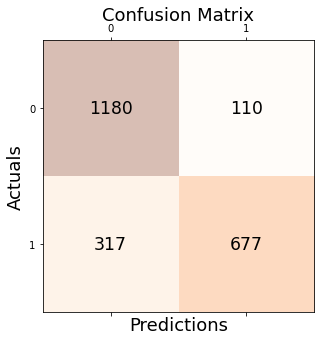

In [113]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=cv_test_y, y_pred=all_combined_pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.859
SVM: ROC AUC=0.854
DecisionTree: ROC AUC=0.767
RandomTree: ROC AUC=0.852
XGBoost: ROC AUC=0.837
LSTM GLOVE: ROC AUC=0.882


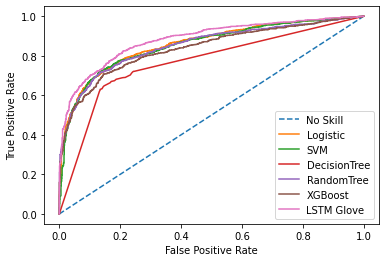

In [114]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


ns_probs = [0 for _ in range(len(cv_test_y))]
'''
lr_pred_y_prob = cus_en_lr.predict_proba(cv_test_X)
svm_pred_y_prob = cus_en_svm.predict_proba(cv_test_X)
dt_pred_y_prob = cus_en_dt.predict_proba(tfidf_test_X)
rd_pred_y_prob = cus_en_rd.predict_proba(cv_test_X)
xgb_pred_y_prob = cus_xgb_clf.predict_proba(pca_w2v_test_X)
lstm_glv_pred_y_prob
'''
lr_probs = lr_pred_y_prob[:, 1]
svm_probs = svm_pred_y_prob[:, 1]
dt_probs = dt_pred_y_prob[:, 1]
rd_probs = rd_pred_y_prob[:, 1]
xgb_probs = xgb_pred_y_prob[:, 1]

# calculate scores
ns_auc = roc_auc_score(cv_test_y, ns_probs)

lr_auc = roc_auc_score(cv_test_y, lr_probs)
svm_auc = roc_auc_score(cv_test_y, svm_probs)
dt_auc = roc_auc_score(cv_test_y, dt_probs)
rd_auc = roc_auc_score(cv_test_y, rd_probs)
xgb_auc = roc_auc_score(cv_test_y, xgb_probs)
lstm_glv_auc = roc_auc_score(cv_test_y, lstm_glv_pred_y_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('DecisionTree: ROC AUC=%.3f' % (dt_auc))
print('RandomTree: ROC AUC=%.3f' % (rd_auc))
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
print('LSTM GLOVE: ROC AUC=%.3f' % (lstm_glv_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(cv_test_y, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(cv_test_y, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(cv_test_y, svm_probs)
dt_fpr, dt_tpr, _ = roc_curve(tfidf_test_y, dt_probs)
rd_fpr, rd_tpr, _ = roc_curve(cv_test_y, rd_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(pca_w2v_test_y, xgb_probs)
lstm_glv_fpr, lstm_glv_tpr, _ = roc_curve(pad_y_test, lstm_glv_pred_y_prob)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, label='Logistic')

pyplot.plot(svm_fpr, svm_tpr, label='SVM')
pyplot.plot(dt_fpr, dt_tpr, label='DecisionTree')
pyplot.plot(rd_fpr, rd_tpr, label='RandomTree')
pyplot.plot(xgb_fpr, xgb_tpr, label='XGBoost')
pyplot.plot(lstm_glv_fpr, lstm_glv_tpr, label='LSTM Glove')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

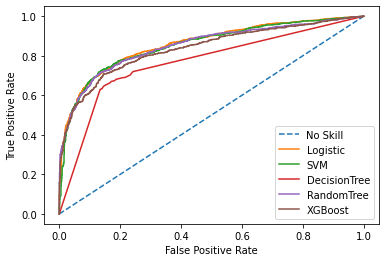

In [115]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

pyplot.plot(lr_fpr, lr_tpr, label='Logistic')
pyplot.plot(svm_fpr, svm_tpr, label='SVM')
pyplot.plot(dt_fpr, dt_tpr, label='DecisionTree')
pyplot.plot(rd_fpr, rd_tpr, label='RandomTree')
pyplot.plot(xgb_fpr, xgb_tpr, label='XGBoost')

#pyplot.plot(lstm_glv_fpr, lstm_glv_tpr, marker='.', label='LSTM Glove')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

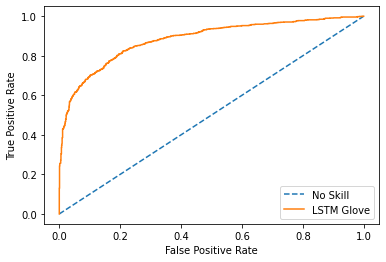

In [116]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
'''
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='DecisionTree')
pyplot.plot(rd_fpr, rd_tpr, marker='.', label='RandomTree')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')
'''
pyplot.plot(lstm_glv_fpr, lstm_glv_tpr, label='LSTM Glove')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()